In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
events = pd.read_csv("events.csv", parse_dates=["date"])

clicks = pd.read_csv("clicks.csv", parse_dates = ["created"])

installs = pd.read_csv("installs.csv", parse_dates = ["created"])

/home/pelozo/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (12,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
clicks["created"] = clicks["created"].astype("datetime64[ns]")

In [4]:
events.to_pickle("events pickle")

In [5]:
clicks.to_pickle("clicks pickle")

In [6]:
installs.to_pickle("installs pickle")

In [2]:
events = pd.read_pickle("events pickle")
clicks = pd.read_pickle("clicks pickle")
installs = pd.read_pickle("installs pickle")

In [245]:
clicks.columns

Index(['advertiser_id', 'action_id', 'source_id', 'created', 'country_code',
       'latitude', 'longitude', 'wifi_connection', 'carrier_id', 'trans_id',
       'os_minor', 'agent_device', 'os_major', 'specs_brand', 'brand',
       'timeToClick', 'touchX', 'touchY', 'ref_type', 'ref_hash'],
      dtype='object')

In [3]:
events.head()

,date,event_id,ref_type,ref_hash,application_id,attributed,device_countrycode,device_os_version,device_brand,device_model,...,trans_id,user_agent,event_uuid,carrier,kind,device_os,wifi,connection_type,ip_address,device_language
0,2019-03-05 00:09:36.966,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,NaN,NaN,a9c0b263-acb2-4577-92c5-cbde5d7a5db1,2.248157e+17,5.516623e+18,7.531669e+18,NaN,Cable/DSL,7858558567428669000,4.077062e+17
1,2019-03-05 00:09:38.920,1,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,NaN,NaN,1cd98205-0d97-4ec2-a019-667997dbfe7a,2.248157e+17,9.977660e+17,7.531669e+18,NaN,Cable/DSL,7858558567428669000,4.077062e+17
2,2019-03-05 00:09:26.195,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,NaN,NaN,f02e2924-21ae-492b-b625-9021ae0a4eca,2.248157e+17,5.516623e+18,7.531669e+18,NaN,Cable/DSL,7858558567428669000,4.077062e+17
3,2019-03-05 00:09:31.107,2,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,NaN,NaN,a813cf45-a36e-4668-85e2-5395f1564e98,2.248157e+17,8.561153e+18,7.531669e+18,NaN,Cable/DSL,6324037615828123965,4.077062e+17
4,2019-03-09 21:00:36.585,3,1891515180541284343,2635154697734164782,38,False,6333597102633388268,7.391844e+18,NaN,5.960896e+18,...,NaN,NaN,63a4f0aa-e147-469f-8c55-4ca4f8d0e310,2.248157e+17,8.731902e+17,7.531669e+18,NaN,Cable/DSL,2894495631302821483,3.301378e+18


In [4]:
clicks.head()

,advertiser_id,action_id,source_id,created,country_code,latitude,longitude,wifi_connection,carrier_id,trans_id,os_minor,agent_device,os_major,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash
0,2,NaN,4,2019-03-06 22:42:12.755,6333597102633388268,1.205689,1.070234,False,1.0,iGgClCM9exiHF4K31g94XmvHEBSLKIY,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,1.563,0.905,0.078,1891515180541284343,1904083516767779093
1,0,NaN,0,2019-03-08 10:24:30.641,6333597102633388268,1.218924,1.071209,False,4.0,MMHTOJ6qKAOeIH_Eywh1KIcCaxtO9oM,3.025219e+18,NaN,1.774085e+18,392184377613098015,NaN,NaN,NaN,NaN,1891515180541284343,3086509764961796666
2,0,NaN,0,2019-03-08 15:24:16.069,6333597102633388268,1.205689,1.070234,False,6.0,vIrEIdf9izUaWdAri6Ezk7T3nHFvNQU,5.975656e+18,NaN,3.072849e+18,392184377613098015,NaN,NaN,0.946,0.473,1891515180541284343,6958163894863846647
3,2,NaN,3,2019-03-06 03:08:51.543,6333597102633388268,1.205689,1.070234,False,45.0,YaKxxEAs2UmZhSpRfiCO9Zpa82B_AKM,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,19.013,0.035,0.431,1891515180541284343,4368617728156436525
4,2,NaN,3,2019-03-06 03:32:55.570,6333597102633388268,1.205689,1.070234,False,45.0,X5XTOcYQovkl6yadYdAD7xioVGU9jiY,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,28.110,0.054,0.423,1891515180541284343,4368617728156436525


In [5]:
events.head()

,date,event_id,ref_type,ref_hash,application_id,attributed,device_countrycode,device_os_version,device_brand,device_model,...,trans_id,user_agent,event_uuid,carrier,kind,device_os,wifi,connection_type,ip_address,device_language
0,2019-03-05 00:09:36.966,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,NaN,NaN,a9c0b263-acb2-4577-92c5-cbde5d7a5db1,2.248157e+17,5.516623e+18,7.531669e+18,NaN,Cable/DSL,7858558567428669000,4.077062e+17
1,2019-03-05 00:09:38.920,1,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,NaN,NaN,1cd98205-0d97-4ec2-a019-667997dbfe7a,2.248157e+17,9.977660e+17,7.531669e+18,NaN,Cable/DSL,7858558567428669000,4.077062e+17
2,2019-03-05 00:09:26.195,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,NaN,NaN,f02e2924-21ae-492b-b625-9021ae0a4eca,2.248157e+17,5.516623e+18,7.531669e+18,NaN,Cable/DSL,7858558567428669000,4.077062e+17
3,2019-03-05 00:09:31.107,2,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,NaN,NaN,a813cf45-a36e-4668-85e2-5395f1564e98,2.248157e+17,8.561153e+18,7.531669e+18,NaN,Cable/DSL,6324037615828123965,4.077062e+17
4,2019-03-09 21:00:36.585,3,1891515180541284343,2635154697734164782,38,False,6333597102633388268,7.391844e+18,NaN,5.960896e+18,...,NaN,NaN,63a4f0aa-e147-469f-8c55-4ca4f8d0e310,2.248157e+17,8.731902e+17,7.531669e+18,NaN,Cable/DSL,2894495631302821483,3.301378e+18


In [4]:
events["device_language"].value_counts().head()

6.977049e+18    745898
3.301378e+18    589865
9.028383e+18    388832
6.804428e+18    340624
4.621024e+18    150143
Name: device_language, dtype: int64

In [5]:
events["device_language"].nunique()

186

##### 186 Lenguajes de dispositivo

In [19]:
events["device_countrycode"].value_counts()

6333597102633388268    2494423
Name: device_countrycode, dtype: int64

#### Un único código de país, igual que en auctions

### ¿Cuantos tipos de eventos?

In [8]:
events["event_id"].nunique()

568

In [68]:
events["event_uuid"].nunique()

2489324

### ¿Cuántos eventos atribuidos?

In [21]:
events["attributed"].value_counts()

False    2489324
True        5099
Name: attributed, dtype: int64

### ¿Cuales son los eventos más presentes?

In [44]:
events["event_id"].value_counts().head(10)

22     618228
31     417070
161    217846
1      157812
138    100039
162     84898
329     56490
156     53332
33      48581
171     43942
Name: event_id, dtype: int64

### ¿Cúantos id de aplicaciones?

In [7]:
events["application_id"].nunique()

269

In [6]:
events["application_id"].value_counts().head()

66     325696
64     259084
145    252431
63     181555
103    137513
Name: application_id, dtype: int64

### Vistazo a cantidad de dispositivos

In [11]:
events["ref_hash"].value_counts().head(10)

7823950631004872496    2913
7298478026707033340    2822
5034957474698180142    2681
5724169280369284055    2524
1706781657278990931    2300
244029859389272148     2240
7526135353349769077    2079
8876061431560425145    2053
99390558091295167      1966
2514745445577342929    1925
Name: ref_hash, dtype: int64

In [13]:
events["ref_hash"].nunique()

196049

### ¿Cuantos de los dispositivos que clickearon estan entre los datos de eventos?

In [12]:
clicks[ clicks["ref_hash"].isin(events["ref_hash"])].nunique()

advertiser_id         3
action_id             0
source_id             5
created            1780
country_code          1
latitude             33
longitude            35
wifi_connection       1
carrier_id           28
trans_id           1780
os_minor             18
agent_device         53
os_major             10
specs_brand           3
brand                12
timeToClick        1533
touchX              737
touchY              957
ref_type              2
ref_hash           1196
dtype: int64

#### Hay 1196 dispositivos que se encuentran en los dos sets de datos

In [11]:
len(clicks)

1780

In [13]:
events[events["ref_hash"].isin(clicks["ref_hash"])].nunique()

date                  15344
event_id                137
ref_type                  2
ref_hash               1196
application_id           55
attributed                2
device_countrycode        1
device_os_version        29
device_brand             26
device_model            237
device_city              17
session_user_agent       99
trans_id                  0
user_agent              244
event_uuid            15172
carrier                   6
kind                    141
device_os                 4
wifi                      2
connection_type           2
ip_address             3196
device_language          14
dtype: int64

In [12]:
len(events)

15345

# Analisis Clicks - Eventos

In [6]:
# Acorto los dataframes con las columnas que me interesan

clicks_short = clicks[["created","ref_hash","advertiser_id","source_id"]]
events_short = events[["date","ref_hash","event_id","attributed"]]


In [7]:
clicks_short.dtypes

created          datetime64[ns]
ref_hash                  int64
advertiser_id             int64
source_id                 int64
dtype: object

In [8]:
events_short.dtypes

date          datetime64[ns]
ref_hash               int64
event_id               int64
attributed              bool
dtype: object

In [9]:
events_short.head()

,date,ref_hash,event_id,attributed
0,2019-03-05 00:09:36.966,2688759737656491380,0,False
1,2019-03-05 00:09:38.920,2688759737656491380,1,False
2,2019-03-05 00:09:26.195,2688759737656491380,0,False
3,2019-03-05 00:09:31.107,2688759737656491380,2,False
4,2019-03-09 21:00:36.585,2635154697734164782,3,False


In [28]:
clicks_short.head()

,created,ref_hash,advertiser_id,source_id
0,2019-03-06 22:42:12.755,1904083516767779093,2,4
1,2019-03-08 10:24:30.641,3086509764961796666,0,0
2,2019-03-08 15:24:16.069,6958163894863846647,0,0
3,2019-03-06 03:08:51.543,4368617728156436525,2,3
4,2019-03-06 03:32:55.570,4368617728156436525,2,3


In [58]:
# Me quedo solo con los datos de los dipositivos que pertenecen a los dos dataframes
join = pd.merge(clicks_short, events_short, on='ref_hash', how='inner')\
         .rename(columns={"date":"fecha_evento","created":"fecha_click"})

In [15]:
join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23655 entries, 0 to 23654
Data columns (total 7 columns):
fecha_click      23655 non-null datetime64[ns]
ref_hash         23655 non-null int64
advertiser_id    23655 non-null int64
source_id        23655 non-null int64
fecha_evento     23655 non-null datetime64[ns]
event_id         23655 non-null int64
attributed       23655 non-null bool
dtypes: bool(1), datetime64[ns](2), int64(4)
memory usage: 1.3 MB


In [16]:
join.head()

,fecha_click,ref_hash,advertiser_id,source_id,fecha_evento,event_id,attributed
0,2019-03-08 15:24:16.069,6958163894863846647,0,0,2019-03-10 23:22:46.710,31,False
1,2019-03-08 15:24:16.069,6958163894863846647,0,0,2019-03-10 23:18:48.917,31,False
2,2019-03-08 15:24:16.069,6958163894863846647,0,0,2019-03-10 23:33:31.567,31,False
3,2019-03-08 15:24:16.069,6958163894863846647,0,0,2019-03-11 21:41:23.980,31,False
4,2019-03-08 15:24:16.069,6958163894863846647,0,0,2019-03-10 23:38:48.879,329,False


In [59]:
join_sorted = join.sort_values(by = ["fecha_click","fecha_evento"])

In [43]:
join_sorted.head()

,fecha_click,ref_hash,advertiser_id,source_id,fecha_evento,event_id,attributed
4272,2019-03-05 01:44:16.824,6447802891648830796,0,1,2019-03-07 13:46:20.674,31,True
4273,2019-03-05 01:44:16.824,6447802891648830796,0,1,2019-03-07 13:46:21.387,22,False
4274,2019-03-05 01:44:16.824,6447802891648830796,0,1,2019-03-07 13:46:53.199,22,False
4275,2019-03-05 01:44:16.824,6447802891648830796,0,1,2019-03-07 13:46:06.772,22,False
4276,2019-03-05 01:44:16.824,6447802891648830796,0,1,2019-03-09 03:36:06.761,31,False


### ¿Cúales son los eventos que más se repiten despues de un click?

In [52]:
def autolabel_height(grafico, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    xpos = xpos.lower()  # normalize the case of the parameter
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}  # x_txt = x + w*off

    for bar in grafico.patches:
        height = bar.get_height()
        grafico.text(bar.get_x() + bar.get_width()*offset[xpos], 1.01*height,
                '{}'.format(height), ha=ha[xpos], va='bottom')


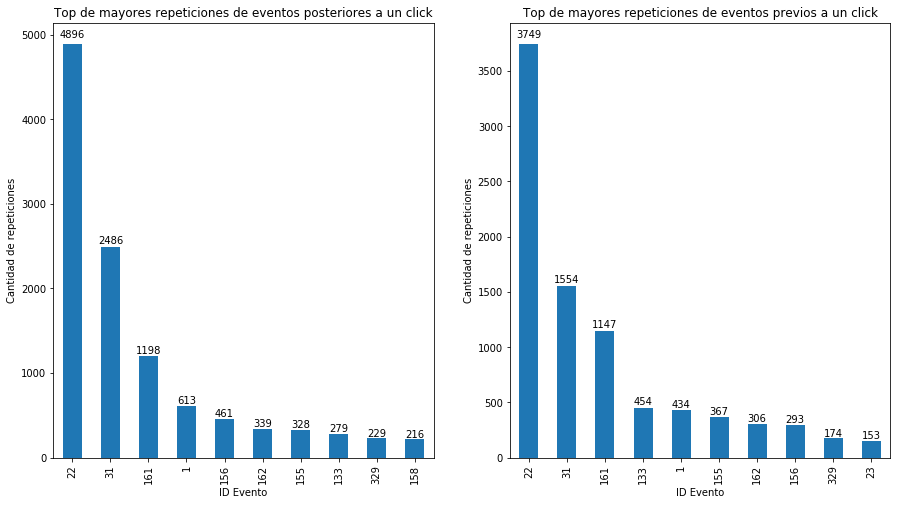

In [60]:
fig,ejes = plt.subplots(nrows = 1,ncols =2,figsize = (30,16))
ax1 = ejes[0]
ax2 = ejes[1]



grafico1 = join_sorted[ join_sorted["fecha_evento"] <= join_sorted["fecha_click"] ]\
                 .groupby("event_id").count()["fecha_evento"].nlargest(10)\
                 .plot(kind="bar",figsize = (15,8), ax=ax1)
 
grafico2 = join_sorted[ join_sorted["fecha_evento"] >= join_sorted["fecha_click"] ]\
                 .groupby("event_id").count()["fecha_evento"].nlargest(10)\
                 .plot(kind="bar",figsize = (15,8), ax = ax2)



ax1.set_title("Top de mayores repeticiones de eventos posteriores a un click")
ax1.set_xlabel("ID Evento")
ax1.set_ylabel("Cantidad de repeticiones")
autolabel_height(grafico1)
    
ax2.set_title("Top de mayores repeticiones de eventos previos a un click")
ax2.set_xlabel("ID Evento")
ax2.set_ylabel("Cantidad de repeticiones")
autolabel_height(grafico2)    
    

### ¿Que tal los eventos que más se repiten dentro de los 10 minutos anteriores a un click?


In [334]:
# Esto no se como plantearlo todavia


In [84]:
def fecha_en_intervalo(fecha_inicial,fecha_interes, minutos): 
  return (fecha_inicial - pd.DateOffset(minutes=minutos)) <= fecha_interes

In [73]:
join_sorted [ join_sorted['fecha_click'] - pd.DateOffset(minutes=10) <= (join_sorted["fecha_evento"]) ]

,fecha_click,ref_hash,advertiser_id,source_id,fecha_evento,event_id,attributed
4275,2019-03-05 01:44:16.824,6447802891648830796,0,1,2019-03-07 13:46:06.772,22,False
4272,2019-03-05 01:44:16.824,6447802891648830796,0,1,2019-03-07 13:46:20.674,31,True
4273,2019-03-05 01:44:16.824,6447802891648830796,0,1,2019-03-07 13:46:21.387,22,False
4274,2019-03-05 01:44:16.824,6447802891648830796,0,1,2019-03-07 13:46:53.199,22,False
4276,2019-03-05 01:44:16.824,6447802891648830796,0,1,2019-03-09 03:36:06.761,31,False
19020,2019-03-05 02:33:41.204,6443314382786145865,0,5,2019-03-09 22:41:58.508,22,False
19018,2019-03-05 02:33:41.204,6443314382786145865,0,5,2019-03-09 22:42:48.275,22,False
19019,2019-03-05 02:33:41.204,6443314382786145865,0,5,2019-03-09 22:43:04.269,22,False
4317,2019-03-05 02:37:29.860,5957203859194520830,0,1,2019-03-09 03:42:33.846,161,False
4316,2019-03-05 02:37:29.860,5957203859194520830,0,1,2019-03-09 03:42:35.574,1,False


## ¿Cual es el evento que predomina según hora del dia ?

In [96]:
events_hour = events_short.copy()
events_hour["date"] = events_hour["date"].dt.hour

In [97]:
events_hour = events_hour.groupby(["date", "event_id"])\
                         .agg({"ref_hash":"count","attributed":"sum"}).reset_index()
                           

In [98]:
#Obtengo el evento que más se repite por hora

events_hour = events_hour.loc[ events_hour.groupby(["date"])["ref_hash"].idxmax() ]

In [99]:
events_hour.set_index("date",inplace = True)

In [147]:
def autolabel(grafico,etiquetas, xpos="center"):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    xpos = xpos.lower()  # normalize the case of the parameter
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}  # x_txt = x + w*off    
    
    for barra in grafico.patches:
        height = barra.get_height()
        grafico.text(barra.get_x() + barra.get_width()*offset[xpos], 1.01*height,
                etiquetas.pop(0), ha=ha[xpos], va='bottom',color="Blue")

In [233]:
def autolabel(grafico,etiquetas, xpos="center"):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    xpos = xpos.lower()  # normalize the case of the parameter
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}  # x_txt = x + w*off    
    
    for barra in grafico.patches:
        height = barra.get_height()
        grafico.text( barra.get_width()+ 1000, barra.get_y(),
                etiquetas.pop(0), ha=ha[xpos], va='bottom',color="Blue")

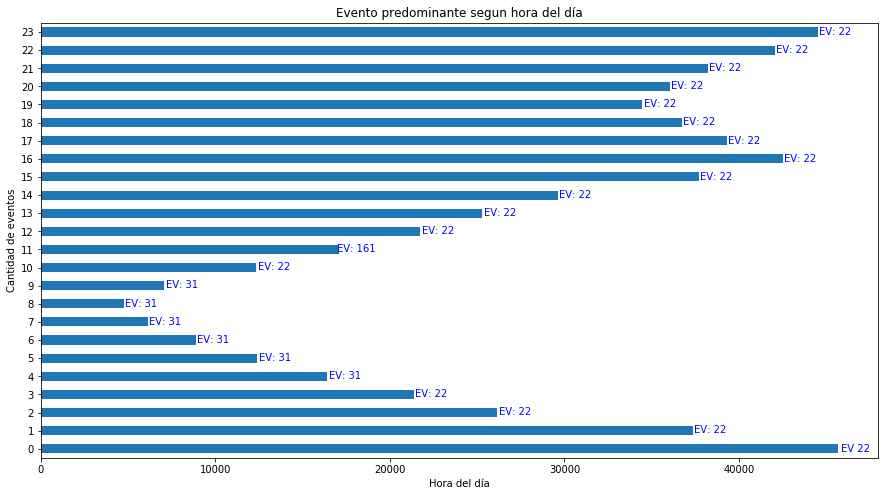

In [235]:
# Estoy buscando una manera de reemplazar las etiquetas con colores dependiendo del evento


fig,ax = plt.subplots(nrows = 1,ncols =1,figsize = (15,8))

grafico = events_hour[["ref_hash"]].plot(kind="barh",ax=ax)

ax.set_xlabel("Hora del día")
ax.set_ylabel("Cantidad de eventos")
ax.set_title("Evento predominante segun hora del día")
ax.get_legend().remove()

valores = events_hour["event_id"].values
etiquetas = ["EV 22"]
for valor in valores :
    etiquetas.append( "EV: {}".format(valor))
    
autolabel(grafico,etiquetas)

# Eventos attributed

In [250]:
col_events = ['date', 'ref_hash','event_id', 'application_id','attributed',
              'kind', 'device_os', 'wifi','connection_type', 'device_language']
    
col_clicks = ['created','ref_hash','advertiser_id',  'wifi_connection', 'brand',
            'timeToClick', 'touchX', 'touchY']

In [251]:
clicks_short =  clicks[col_clicks]
events_short = events[ col_events]

In [303]:
join = pd.merge(clicks_short, events_short, on='ref_hash', how='inner')\
         .rename(columns={"date":"fecha_evento","created":"fecha_click"})

In [304]:
join.sort_values(by = ["fecha_click","fecha_evento"], inplace = True)

In [305]:
join.reset_index(inplace = True, drop=True)

In [264]:
join.head()

,fecha_click,ref_hash,advertiser_id,wifi_connection,brand,timeToClick,touchX,touchY,fecha_evento,event_id,application_id,attributed,kind,device_os,wifi,connection_type,device_language
0,2019-03-05 01:44:16.824,6447802891648830796,0,False,NaN,NaN,0.091,0.36,2019-03-07 13:46:06.772,22,56,False,5.500848e+18,NaN,False,NaN,6.535228e+18
1,2019-03-05 01:44:16.824,6447802891648830796,0,False,NaN,NaN,0.091,0.36,2019-03-07 13:46:20.674,31,56,True,NaN,NaN,False,NaN,6.535228e+18
2,2019-03-05 01:44:16.824,6447802891648830796,0,False,NaN,NaN,0.091,0.36,2019-03-07 13:46:21.387,22,56,False,5.500848e+18,NaN,False,NaN,6.535228e+18
3,2019-03-05 01:44:16.824,6447802891648830796,0,False,NaN,NaN,0.091,0.36,2019-03-07 13:46:53.199,22,56,False,5.500848e+18,NaN,False,NaN,6.535228e+18
4,2019-03-05 01:44:16.824,6447802891648830796,0,False,NaN,NaN,0.091,0.36,2019-03-09 03:36:06.761,31,212,False,5.104972e+18,NaN,NaN,NaN,6.111820e+18


In [265]:
join_attributed = join[join["attributed"] == True]

In [272]:
join_attributed.head(10)

,fecha_click,ref_hash,advertiser_id,wifi_connection,brand,timeToClick,touchX,touchY,fecha_evento,event_id,application_id,attributed,kind,device_os,wifi,connection_type,device_language
1,2019-03-05 01:44:16.824,6447802891648830796,0,False,NaN,NaN,0.091,0.360,2019-03-07 13:46:20.674,31,56,True,NaN,NaN,False,NaN,6.535228e+18
28,2019-03-06 03:02:40.352,8983455136472355809,8,False,NaN,0.695,0.257,0.988,2019-03-06 03:02:48.978,31,16,True,NaN,NaN,True,NaN,6.977049e+18
30,2019-03-06 03:02:40.352,8983455136472355809,8,False,NaN,0.695,0.257,0.988,2019-03-06 03:02:50.404,513,16,True,NaN,NaN,False,NaN,6.977049e+18
49,2019-03-07 03:18:47.567,6447802891648830796,0,False,NaN,NaN,0.262,0.003,2019-03-07 13:46:20.674,31,56,True,NaN,NaN,False,NaN,6.535228e+18
143,2019-03-07 16:10:19.915,8569678576097759996,0,False,2.0,NaN,NaN,NaN,2019-03-07 22:57:43.585,31,102,True,NaN,NaN,True,NaN,6.977049e+18
152,2019-03-07 16:10:19.915,8569678576097759996,0,False,2.0,NaN,NaN,NaN,2019-03-09 17:08:20.595,133,102,True,NaN,NaN,True,NaN,6.977049e+18
156,2019-03-07 16:10:19.915,8569678576097759996,0,False,2.0,NaN,NaN,NaN,2019-03-09 17:15:02.056,133,102,True,NaN,NaN,True,NaN,6.977049e+18
162,2019-03-07 16:10:19.915,8569678576097759996,0,False,2.0,NaN,NaN,NaN,2019-03-10 01:29:00.788,133,102,True,NaN,NaN,True,NaN,6.977049e+18
167,2019-03-07 16:10:19.915,8569678576097759996,0,False,2.0,NaN,NaN,NaN,2019-03-10 01:44:38.268,133,102,True,NaN,NaN,True,NaN,6.977049e+18
171,2019-03-07 16:10:19.915,8569678576097759996,0,False,2.0,NaN,NaN,NaN,2019-03-10 02:06:22.781,133,102,True,NaN,NaN,True,NaN,6.977049e+18


# ¿Cúal es la diferencia más corta y más larga entre un click y un evento que se da como atribuido a Jammp?

In [313]:
#diferencias = join_attributed[ join_attributed["fecha_click"] <= join_attributed["fecha_evento"]]

In [320]:
diferencias = join_attributed.groupby(["fecha_click","ref_hash"])["fecha_evento"]\
                             .agg(["min","max"]).reset_index()\

In [321]:
diferencias["min"] = diferencias.apply(lambda x: x["min"] - x["fecha_click"],axis = 1)

In [322]:
diferencias["max"] = diferencias.apply(lambda x: x["max"] - x["fecha_click"],axis = 1)

In [325]:
diferencias

,fecha_click,ref_hash,min,max
0,2019-03-05 01:44:16.824,6447802891648830796,2 days 12:02:03.850000,2 days 12:02:03.850000
1,2019-03-06 03:02:40.352,8983455136472355809,0 days 00:00:08.626000,0 days 00:00:10.052000
2,2019-03-07 03:18:47.567,6447802891648830796,0 days 10:27:33.107000,0 days 10:27:33.107000
3,2019-03-07 16:10:19.915,8569678576097759996,0 days 06:47:23.670000,4 days 03:06:08.028000
4,2019-03-07 16:26:48.944,8569678576097759996,0 days 06:30:54.641000,4 days 02:49:38.999000
5,2019-03-07 16:46:58.788,4423154736192166693,0 days 00:00:06.059000,2 days 07:53:21.185000
6,2019-03-07 21:43:09.081,1197020933501942270,0 days 00:18:18.993000,0 days 23:32:57.826000
7,2019-03-07 22:49:13.864,7582955077272111400,-1 days +16:35:57.303000,5 days 16:54:14.799000
8,2019-03-07 22:58:04.975,1278284809962287650,-2 days +16:49:04.696000,-2 days +18:34:47.072000
9,2019-03-07 23:31:04.248,5537739999601585973,-3 days +22:22:57.228000,-3 days +22:58:18.049000


#### En el dataframe se observa que hay intervalos negativos, esto se debe a que hay eventos registrados con fechas anteriores a los clicks registrados en este periodo de tiempo, por lo que se infiere a que estos eventos estan conectados a otros clicks q

In [323]:
diferencias["min"].min()

Timedelta('-9 days +23:03:13.619000')

In [324]:
diferencias["max"].max

Timedelta('5 days 16:54:14.799000')

### Se observa que la menor diferencia de tiempo entre un click y un evento atribuido a Jammp es de 5 segundos. Mientras que el mayor tiempo registrado en el dataset para la atribución de un evento es de 5 Dias y casi 17 horas